# hvPlot-Beispiele


## Installation

Um die Beispiele ausführen zu können, muss zusätzlich [Snappy](https://github.com/google/snappy) installiert werden.

Mit [Spack](https://www.python4data.science/de/latest/productive/envs/spack/index.html) könnt ihr Snappy in eurem Kernel bereitstellen, z.B. mit:

``` sh
$ spack env activate python-311
$ snappy@1.1.8
```

Alternativ könnt ihr Snappy auch mit anderen Paketmanagern installieren, z.B.

* Für Debian/Ubuntu:

  ``` sh
  $ sudo apt install libsnappy-dev
  ```

* Für Windows:

  Snappy benötigt Microsoft Visual C++ ≥ 14.0. Dies kann installiert werden mit den [Microsoft C++ Build Tools](https://visualstudio.microsoft.com/visual-cpp-build-tools/).

* Für Mac OS:

  ``` sh
  $ brew install snappy
  ```

Anschließend sollten für euren Kernel noch weitere Pakete installiert werden, z.B. mit:

  ``` sh
  $ pipenv install intake intake-parquet s3fs python-snappy pyviz-comms
  …
  ```

## Einführung

Als erstes importieren wir Numpy und Pandas um anschließend einen kleinen Satz zufälliger Daten zu erstellen:

In [1]:
import numpy as np
import pandas as pd


index = pd.date_range("1/1/2000", periods=1000)
df = pd.DataFrame(
    np.random.randn(1000, 4), index=index, columns=list("ABCD")
).cumsum()

df.head()

,A,B,C,D
2000-01-01,1.431985,1.378913,0.539567,0.257977
2000-01-02,1.266573,0.834050,1.176750,1.458363
2000-01-03,1.799283,0.945437,1.792629,-0.220764
2000-01-04,2.131248,0.160377,1.186063,-0.702810
2000-01-05,3.574972,2.274926,1.759324,-1.297244


### Pandas`.plot ()`-API

Pandas bietet standardmäßig Matplotlib-basiertes Plotten mit der `.plot()`-Methode:

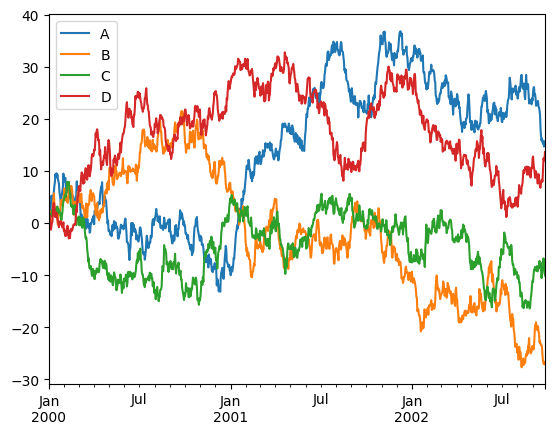

In [2]:
%matplotlib inline

df.plot();

Das Ergebnis ist ein PNG-Bild, das leicht angezeigt werden kann, ansonsten aber statisch ist.

> **Hinweis:** In Pandas > 0.25.0 kann das Backend ausgetauscht werden, z.B. mit `pd.options.backend.plotting == 'holoviews',`. Weitere Informationen hierzu findet ihr unter [Pandas-API](https://hvplot.holoviz.org/user_guide/Pandas_API.html).

### `.hvplot()`

Wenn wir statt `%matplotlib inline` zu `import hvplot.pandas` und der `df.hvplot`-Methode wechseln, , wird jetzt ein interaktiv erforschbares Bokeh-Diagramm erzeugt mit Verschieben und Vergrößern/Verkleinern sowie anklickbaren Legenden:

In [3]:
import hvplot.pandas

df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

Ein solches interaktive Diagramm erleichtert das Erkunden der der Daten erheblich, ohne dass hierfür zusätzlicher Code geschrieben werden müsste.

### Native `hvPlot`-API 

Für das obige Diagramm hat hvPlot die Pandas-`.hvplot()`-Methode dynamisch hinzugefügt, sodass ihr dieselbe Syntax wie bei Pandas-Plots verwenden könnt. Wenn ihr ein expliziteres Vorgehen bevorzugt,könnt ihr stattdessen direkt mit den hvPlot-Objekten arbeiten:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
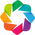

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [4]:
import holoviews as hv

from hvplot import hvPlot


hv.extension("bokeh")

plot = hvPlot(df)
plot(y=["A", "B", "C", "D"])

### Hilfe

Wenn ihr in IPython oder Jupyter-Notebooks arbeitet, vervollständigen die `hvplot`-Methoden automatisch gültige Schlüsselwörter. Wenn ihr beispielsweise nach dem Deklarieren des Plottyps die Tabulatortaste drücken, werden alle gültigen Schlüsselwörter und die Dokumentzeichenfolge angezeigt:

``` Python
df.hvplot.line(TAB
```

Außerhalb einer interaktiven Umgebung werden mit `hvplot.help` alle Informationen für einen Diagrammtyp angezeigt, z.B.:

In [ ]:
hvplot.help("line")

<div class="alert alert-info">

**Siehe auch:**

Weitere Informationen zu den verfügbaren Optionen erhaltet ihr in [Customization](https://hvplot.holoviz.org/user_guide/Customization.html).
</div>

## Plotting

In den folgenden Beispielen wird neben der pandas- auch die dask-hvPlot-API verwendet:

In [6]:
import hvplot.dask

Das `hvplot.sample_data`-Modul erstellt diese Datensätze als Intake-Datenkataloge, die wir mit Pandas laden können:

In [7]:
from hvplot.sample_data import airline_flights, us_crime


crime = us_crime.read()
print(type(crime))
crime.head()

<class 'pandas.core.frame.DataFrame'>


,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,...,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate
0,1960,179323175,288460,9110,17190,NaN,107840,154320,3095700,912100,...,160.9,5.1,9.6,NaN,60.1,86.1,1726.3,508.6,1034.7,183.0
1,1961,182992000,289390,8740,17220,NaN,106670,156760,3198600,949600,...,158.1,4.8,9.4,NaN,58.3,85.7,1747.9,518.9,1045.4,183.6
2,1962,185771000,301510,8530,17550,NaN,110860,164570,3450700,994300,...,162.3,4.6,9.4,NaN,59.7,88.6,1857.5,535.2,1124.8,197.4
3,1963,188483000,316970,8640,17650,NaN,116470,174210,3792500,1086400,...,168.2,4.6,9.4,NaN,61.8,92.4,2012.1,576.4,1219.1,216.6
4,1964,191141000,364220,9360,21420,NaN,130390,203050,4200400,1213200,...,190.6,4.9,11.2,NaN,68.2,106.2,2197.5,634.7,1315.5,247.4


Alternativ können wir `dask.DataFrame` verwenden:

In [8]:
flights = airline_flights.to_dask().persist()
print(type(flights))
flights.head()

<class 'dask.dataframe.core.DataFrame'>


,year,month,day,dayofweek,dep_time,crs_dep_time,arr_time,crs_arr_time,carrier,flight_num,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008.0,11.0,15.0,6.0,1411.0,1420.0,1535.0,1546.0,b'OO',4391.0,...,5.0,11.0,0.0,None,0.0,NaN,NaN,NaN,NaN,NaN
1,2008.0,11.0,28.0,5.0,1222.0,1230.0,1345.0,1356.0,b'OO',4391.0,...,5.0,15.0,0.0,None,0.0,NaN,NaN,NaN,NaN,NaN
2,2008.0,11.0,22.0,6.0,1414.0,1420.0,1540.0,1546.0,b'OO',4391.0,...,5.0,10.0,0.0,None,0.0,NaN,NaN,NaN,NaN,NaN
3,2008.0,11.0,15.0,6.0,1304.0,1305.0,1507.0,1519.0,b'OO',4392.0,...,10.0,9.0,0.0,None,0.0,NaN,NaN,NaN,NaN,NaN
4,2008.0,11.0,22.0,6.0,1323.0,1305.0,1536.0,1519.0,b'OO',4392.0,...,5.0,21.0,0.0,None,0.0,0.0,0.0,0.0,0.0,17.0


### Die Plot-API

Die Schinttstellen

* `dask.dataframe.DataFrame.hvplot`
* `pandas.DataFrame.hvplot`
* `intake.DataSource.plot`

und ihre `Series`-Äquivalente bieten eine leistungsfähige High-Level-API um auch komplexe Plots erzeugen zu können. Dabei kann die `.hvplot`-API entweder direkt oder als Namespace verwendet werden, um bestimmte Plottypen zu generieren.

Die expliziteste Methode zur Verwendung der Plot-API besteht darin, die Namen der Spalten anzugeben, die auf der x- bzw. y-Achse geplottet werden sollen:

In [9]:
crime.hvplot.line(x="Year", y="Violent Crime rate")

:Curve   [Year]   (Violent Crime rate)

Zusaätzlich kann auch noch der Diagrammtyp mit `kind` angegeben werden:

In [10]:
crime.hvplot(x="Year", y="Violent Crime rate", kind="scatter")

:Scatter   [Year]   (Violent Crime rate)

Mit der `by`-Variable könnt ihr die Daten in einer oder mehreren zusätzlichen Spalten gruppieren. Als Beispiel wird im Folgenden die Abfahrtsverzögerung (`'depdelay'`) als Funktion der `'distance'` dargestellt und die Daten nach `'carrier'` gruppiert:

In [11]:
flight_subset = flights[flights.carrier.isin([b"OH", b"F9"])]
flight_subset.hvplot(
    x="distance",
    y="depdelay",
    by="carrier",
    kind="scatter",
    alpha=0.2,
    persist=True,
)

:NdOverlay   [carrier]
   :Scatter   [distance]   (depdelay)

Im obigen Beispiel haben wir die x- und y-Achsen explizit angegeben.

Andernfalls würde für die x-Achse die Pandas-Indexspalte verwendet werden und für die y-Achse alle Nicht-Index-Spalten mit der Standardbezeichnung `'value'`. Wollt ihr nur die y-Achsenbezeichnung explizit angeben, so steht euch die `value_label`-Option zur Verfügung.

In [12]:
crime.hvplot(
    x="Year",
    y=["Violent Crime rate", "Robbery rate", "Burglary rate"],
    value_label="Rate (per 100k people)",
)

:NdOverlay   [Variable]
   :Curve   [Year]   (Rate (per 100k people))

### Der `hvplot`-Namespace 

Statt des k`ind`-Argument können wir auch den `hvplot`-Namespace für den Plotaufruf zu verwenden. Die unterstützten Plottypen lassen sich leicht ermitteln mit der Tab-Vervollständigung, also
``` Python
crime.hvplot.TAB
```

Verfügbare Diagrammtypen sind:

* [area()](#area()) zeichnet ein Flächendiagramm ähnlich einem Liniendiagramm, außer dass der Bereich unter der Kurve gefüllt und optional gestapelt wird
* [bar()](#bar())zeichnet ein Flächendiagramm ähnlich einem Liniendiagramm, außer dass der Bereich unter der Kurve gefüllt und optional gestapelt wird
* [bivariate()](#bivariate()) zeichnet ein Flächendiagramm ähnlich einem Liniendiagramm, außer dass der Bereich unter der Kurve gefüllt und optional gestapelt wird
* [box()](#box()) zeichnet ein [Box-Whisker-Diagramm](https://de.wikipedia.org/wiki/Box-Plot), in dem die Verteilung einer oder mehrerer Variablen verglichen wird
* [heatmap()](#heatma()p) zeichnet Hex-Bins
* [hexbins()](#hexbins()) zeichnet die Verteilung eines oder mehrerer Histogramme als Satz von Containern
* [histogram()](#histogram()) zeichnet die Kernel-Dichteschätzung einer oder mehrerer Variablen
* [kde()](#kde(),-density()) zeichnet die Kernel-Dichteschätzung einer oder mehrerer Variablen
* [line()](#line()) zeichnet ein Liniendiagramm (z. B. für eine Zeitreihe)
* [step()](#step()) zeichnet ein Schrittdiagramm, das einem Liniendiagramm ähnelt
* [scatter()](#scatter()) zeichnet ein Streudiagramm, in dem zwei Variablen verglichen werden 
* [table()](#table()) erzeugt eine SlickGrid-Datentabelle
* [violin()](#violin()) zeichnet ein Violinen-Diagramm, in dem die Verteilung einer oder mehrerer Variablen mithilfe der Kernel-Dichteschätzung verglichen wird

### `area()`

Wie die meisten anderen Diagrammtypen unterstützt das `area`-Diagramm die drei oben beschriebenen Möglichkeiten zum Definieren eines Diagramms. Ein Flächendiagramm ist am nützlichsten, wenn mehrere Variablen in einem gestapelten Diagramm dargestellt werden. Dies kann durch Angabe für die `x`-, `y`- und `by`-Spalten erreicht werden oder mit `columns` und `index`/`use_index` als Optionen für die `x`-Achse.

In [13]:
crime.hvplot.area(x="Year", y=["Robbery", "Aggravated assault"])

:NdOverlay   [Variable]
   :Area   [Year]   (value,Baseline)

Wir können auch explizit `stacked` auf `False` setzen und einen `alpha`-Wert definieren und um die Werte direkt vergleichen zu können:

In [14]:
crime.hvplot.area(
    x="Year", y=["Aggravated assault", "Robbery"], stacked=False, alpha=0.4
)

:NdOverlay   [Variable]
   :Area   [Year]   (value)

Eine andere Verwendung für ein Flächendiagramm besteht darin, die Streuung eines Werts zu visualisieren. Wenn wir beispielsweise den Flugdatensatz verwenden, möchten wir möglicherweise die Streuung der mittleren Verspätungswerte zwischen den Fluggesellschaften sehen. Zu diesem Zweck berechnen wir die mittlere Verzögerung nach Tag und Carrier und dann die minimale/maximale mittlere Verzögerung für alle Carrier. Da die Ausgabe von `hvplot` nur ein reguläres Holoviews-Objekt ist, können wir den Overlay-Operator (`*`) verwenden, um die Diagramme übereinander zu platzieren.

In [15]:
delay_min_max = (
    flights.groupby(["day", "carrier"])["carrier_delay"]
    .mean()
    .groupby("day")
    .agg([np.min, np.max])
)
delay_mean = flights.groupby("day")["carrier_delay"].mean()

delay_min_max.hvplot.area(
    x="day", y="amin", y2="amax", alpha=0.2
) * delay_mean.hvplot()

:Overlay
   .Area.I              :Area   [day]   (amin,amax)
   .Curve.Carrier_delay :Curve   [day]   (carrier_delay)

### `bar()`

Im einfachsten Fall können wir `.hvplot.bar` verwenden. Um die Beschriftung auf der x-Achse um 90° zu drehen, geben wir noch `rot=90` an.

In [16]:
crime.hvplot.bar(x="Year", y="Violent Crime rate", rot=90)

:Bars   [Year]   (Violent Crime rate)

Wenn wir stattdessen mehrere Spalten vergleichen möchten, können wir eine Liste von Spalten festlegen. Mit der `stacked`-Option können wir dann die Spaltenwerte einfacher vergleichen:

In [17]:
crime.hvplot.bar(
    x="Year",
    y=["Violent crime total", "Property crime total"],
    stacked=True,
    rot=90,
    width=800,
    legend="top_left",
)

:Bars   [Year,Variable]   (value)

### `scatter()`

Das Streudiagramm unterstützt viele der Funktionen der obigen Diagrammtypen, kann jedoch mit der `c`-Option auch  eingefärbt werden.

In [18]:
crime.hvplot.scatter(x="Violent Crime rate", y="Burglary rate", c="Year")

:Scatter   [Violent Crime rate]   (Burglary rate,Year)

Um Farbe zur Darstellung einer Dimension zu verwenden, kann die `cmap`-Option genutzt werden werden, um die zu verwendende Farbkarte anzugeben. Zusätzlich kann die Farbleiste deaktiviert werden mit `colorbar=False`.

### `step()`

Ein Schrittdiagramm ist einem Liniendiagramm sehr ähnlich, aber anstatt linear zwischen Abtastwerten zu interpolieren, visualisiert das Schrittdiagramm diskrete Schritte. Die Position der Schritte kann mit dem `where`-Schlüsselwort un den Werten `'pre'`, `'mid'` (Standard) und `'post'` gesteuert werden.

In [19]:
crime.hvplot.step(x="Year", y=["Robbery", "Aggravated assault"])

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

### `hexbin()`

Mit der `hexbin`-Methode können Sie hexagonale Bin-Diagramme erstellen. Sie können eine nützliche Alternative zu Streudiagrammen sein, wenn die Daten zu dicht sind, um jeden Punkt einzeln zu zeichnen. Da unsere Flugdaten nicht gleichmäßig auf einer linearen Skala verteilt sind, verwenden wir die `logz`-Option für eine logarithmische Skala.

In [20]:
flights.hvplot.hexbin(
    x="airtime", y="arrdelay", width=600, height=500, logz=True
)

:HexTiles   [airtime,arrdelay]

### `bivariate()`

Mit der `bivariate`-Methode könnt ihr ein 2D-Dichtediagramm erstellen. Bivariate Diagramme sind neben Hexbin-Diagrammen eine weitere Alternative zu Streudiagrammen, wenn die Daten zu dicht sind, um jeden Punkt einzeln zu zeichnen.

In [21]:
crime.hvplot.bivariate(
    x="Violent Crime rate", y="Burglary rate", width=600, height=500
)

:Bivariate   [Violent Crime rate,Burglary rate]   (Density)

### `heatmap()`

`HeatMap` kann die Beziehung zwischen drei Variablen anzeigen und neben den Variablen `'x'` und `'y'` zusätzlich `'C'` anzeigen. Zusätzlich werden mit der `reduce_function` die Werte für jeden Container aus den Stichproben berechnet.

In [22]:
flights.compute().hvplot.heatmap(
    x="day", y="carrier", C="depdelay", reduce_function=np.mean, colorbar=True
)

:HeatMap   [day,carrier]   (depdelay)

### `table()`

Im Gegensatz zu allen anderen Plottypen kann für eine Tabelle nur angegeben werden, ob alle Spalten oder mit `columns` nur eine Teilmenge angezeigt werden soll.

In [23]:
crime.hvplot.table(
    columns=["Year", "Population", "Violent Crime rate"], width=400
)

:Table   [Year,Population,Violent Crime rate]

### `hist()`

Das Zeichnen von Verteilungen unterscheidet sich geringfügig von anderen Plots, da sie im einfachen Fall nur eine Variable darstellen. Daher muss bei diesem Plottyp kein `index` oder `x`-Wert angegeben werden, sondern

* deklariert eine einzelne `y`-Variable, z.B. `source.plot.hist(variable)` oder
* deklariert eine `y`-Variable und eine `by`-Variable, z.B. `source.plot.hist(variable, by='Group')` oder
* deklariert Spalten oder zeichnet alle Spalten, z.B. `source.plot.hist()` oder `source.plot.hist(columns=['A', 'B', 'C'])`

In [24]:
crime.hvplot.hist(y="Violent Crime rate")

:Histogram   [Violent Crime rate]   (Violent Crime rate_count)

Alternativ önnen wir auch die Verteilung mehrerer Spalten darstellen:

In [25]:
columns = ["Violent Crime rate", "Property crime rate", "Burglary rate"]
crime.hvplot.hist(y=columns, bins=50, alpha=0.5, legend="top", height=400)

:NdOverlay   [Element]
   :Histogram   [Burglary rate]   (Burglary rate_count)

Wir können die Daten auch nach anderen Variablen gruppieren und die Carrier in eigene `subplots` aufteilen:

In [26]:
flight_subset = flights[flights.carrier.isin([b"AA", b"US", b"OH"])]
flight_subset.hvplot.hist(
    "depdelay",
    by="carrier",
    bins=20,
    bin_range=(-20, 100),
    width=300,
    subplots=True,
)

:NdLayout   [carrier]
   :Histogram   [depdelay]   (depdelay_count)

### `kde()`, `density()`

Ihr könnt Dichtediagramme auch mit `hvplot.kde()` oder `hvplot.density()` erstellen:

In [27]:
crime.hvplot.kde(y="Violent Crime rate")

:Distribution   [Violent Crime rate]   (Density)

Der Vergleich der Verteilung mehrerer Spalten ist ebenfalls möglich:

In [28]:
columns = ["Violent Crime rate", "Property crime rate", "Burglary rate"]
crime.hvplot.kde(y=columns, alpha=0.5, value_label="Rate", legend="top_right")

:NdOverlay   [Variable]
   :Distribution   [Rate]   (Density)

`hvplot.kde` unterstützt auch das `by`-Schlüsselwort:

In [29]:
flight_subset = flights[flights.carrier.isin([b"AA", b"US", b"OH"])]
flight_subset.hvplot.kde(
    "depdelay", by="carrier", xlim=(-20, 70), width=300, subplots=True
)

:NdLayout   [carrier]
   :Distribution   [depdelay]   (Density)

### `box()`

Genau wie die anderen verteilungsbasierten Diagrammtypen unterstützt das  [Box-Whisker-Diagramm](https://de.wikipedia.org/wiki/Box-Plot) das Zeichnen einer einzelnen Spalte:

In [30]:
crime.hvplot.box(y="Violent Crime rate")

:BoxWhisker   (Violent Crime rate)

Es unterstützt auch mehrere Spalten und die gleichen Optionen wie berits oben genannt:`legend`, `invert` und `value_label`:

In [31]:
columns = [
    "Burglary rate",
    "Larceny-theft rate",
    "Motor vehicle theft rate",
    "Property crime rate",
    "Violent Crime rate",
]
crime.hvplot.box(
    y=columns,
    group_label="Crime",
    legend=False,
    value_label="Rate (per 100k)",
    invert=True,
)

:BoxWhisker   [Crime]   (Rate (per 100k))

Auch die Verwendung des `by`-Schlüsselworts zum Aufteilen der Daten in mehrere Teilmengen wird unterstützt:

In [32]:
flight_subset = flights[flights.carrier.isin([b"AA", b"US", b"OH"])]
flight_subset.hvplot.box("depdelay", by="carrier", ylim=(-10, 70))

:BoxWhisker   [carrier]   (depdelay)

### Zusammengesetzte Diagramme

Eine der Hauptstärken von HoloViews ist die einfache Erstellung verschiedener Diagramme. Einzelne Diagramme können mit den Operatoren `*` und `+` überlagert bzw. zusammengesetzt werden.

<div class="alert alert-info">

**Siehe auch:**

* [Composing Elements](https://holoviews.org/user_guide/Composing_Elements.html)
</div>

In [33]:
crime.hvplot(x="Year", y="Violent Crime rate") * crime.hvplot.scatter(
    x="Year", y="Violent Crime rate", c="k"
)

:Overlay
   .Curve.I   :Curve   [Year]   (Violent Crime rate)
   .Scatter.I :Scatter   [Year]   (Violent Crime rate)

Wir können auch verschiedene Diagramme und Tabellen zusammen erstellen:

In [34]:
(
    crime.hvplot.bar(x="Year", y="Violent Crime rate", rot=90, width=550)
    + crime.hvplot.table(
        ["Year", "Population", "Violent Crime rate"], width=420
    )
)

:Layout
   .Bars.I  :Bars   [Year]   (Violent Crime rate)
   .Table.I :Table   [Year,Population,Violent Crime rate]

### Big Data

In den vorherigen Beispielen fassten wir den relativ große Airline-Datensatz zusammen indem wir Teilmengen für die Darstellung bildeten. Stattdessen können wir die Daten jedoch auch mithilfe von [Datashader](../../datashader.ipynb) aggregieren, wobei der gesamte verfügbare Rohdatensatz gerendert wird (sofern die Auflösung des Bildschirms dies zulässt).

In [35]:
flights.hvplot.scatter(x="distance", y="airtime", datashade=True)

:DynamicMap   []
   :RGB   [distance,airtime]   (R,G,B,A)

### `groupby`

Dank der Fähigkeit von HoloViews, einen Parameterraum mit einer Reihe von Widgets zu erkunden, können wir eine Gruppe entlang einer bestimmten Spalte oder Dimension anwenden, z.B. die Verteilung der Abflugverzögerungen nach Carriern und Tag gruppiert anzeigen, wobei Benutzer\*innen auswählen können, welcher Tag angezeigt werden soll:

In [36]:
flights.hvplot.violin(
    y="depdelay", by="carrier", groupby="dayofweek", ylim=(-20, 60), height=500
)

:DynamicMap   [dayofweek]
   :Violin   [carrier]   (depdelay)